In [1]:
# Code to read file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticating email
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import logging
logging.getLogger('googleapicliet.discovery_cache').setLevel(logging.ERROR)
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1drVvn1y8yHZ7kbEfbH4B1GaCGi7bvrbg'}) # replace the id with id of file you want to access
downloaded.GetContentFile('household_power_consumption.txt')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("household_power_consumption.txt", sep=";")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [0]:
data["date_time"] = data["Date"].str.cat(data["Time"], sep = " ")

In [0]:
data = data.drop(["Date", "Time"], axis = 1)

In [0]:
data = data.set_index("date_time")

In [0]:
data = data.replace("?", nan)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(6)
memory usage: 206.7+ MB


In [0]:
data = data.astype('float')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 206.7+ MB


In [9]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Each row contains power consumption of each minutes of a day

In [10]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
16/12/2006 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
16/12/2006 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
16/12/2006 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
16/12/2006 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
16/12/2006 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [0]:
data.shape

(2075259, 7)

So, we will fill all missing data with same minute of previous day

In [0]:
def handle_missing(data):
  one_day = 24*60
  for row in range(data.shape[0]):
    for col in range(data.shape[1]):
      if np.isnan(data[row, col]):
        data[row, col] = data[row-one_day, col]

In [0]:
handle_missing(data.values)

In [0]:
np.isnan(data).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [0]:
data.to_csv('cleaned_data.csv')

In [0]:
dataset = pd.read_csv('cleaned_data.csv', parse_dates = True, index_col = 'date_time')

In [0]:
data = dataset.resample('D').sum()

In [16]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [18]:
data.loc["2006-12-16"]

Global_active_power       1209.176
Global_reactive_power       34.922
Voltage                  93552.530
Global_intensity          5180.800
Sub_metering_1               0.000
Sub_metering_2             546.000
Sub_metering_3            4926.000
Name: 2006-12-16 00:00:00, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


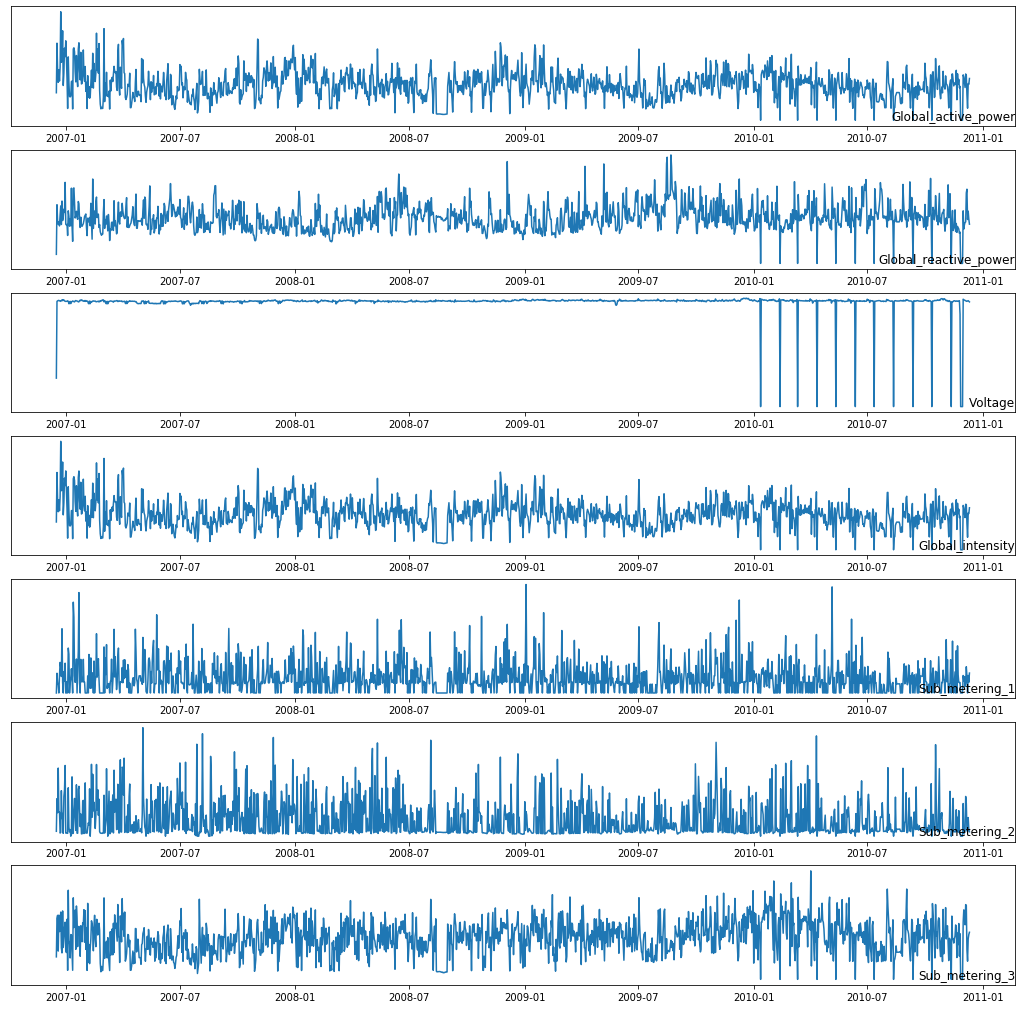

In [19]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()

In [0]:
years = ['2007', '2008', '2009', '2010']

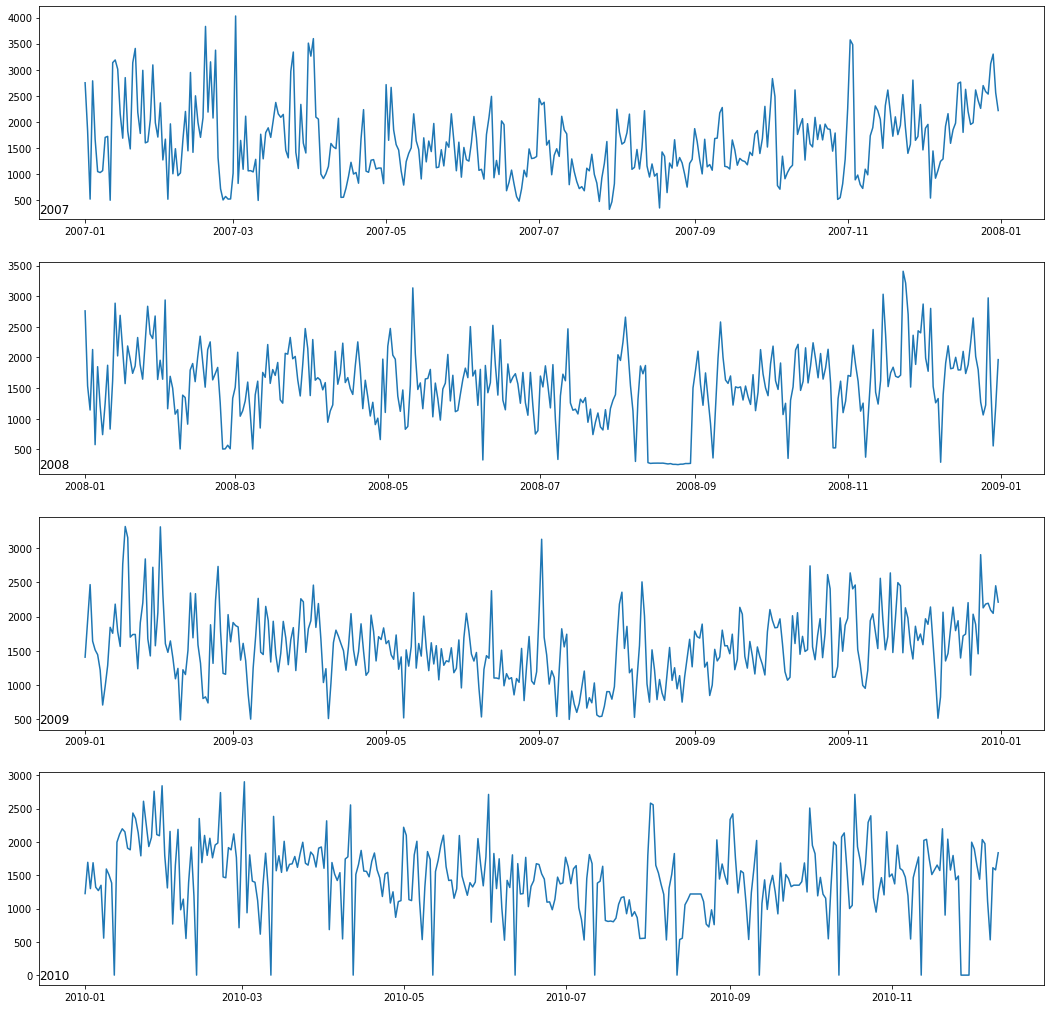

In [21]:
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    plt.plot(active_power_data['Global_active_power'])
    plt.title(str(year), y = 0, loc = 'left')
plt.show()

In [22]:
data['2008']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2008-01-01,2759.738,142.508,347092.81,11489.2,2461.0,2739.0,12355.0
2008-01-02,1534.652,179.250,346118.79,6505.4,336.0,280.0,7241.0
2008-01-03,1141.876,105.158,344781.38,4719.8,0.0,1287.0,2724.0
2008-01-04,2129.052,170.396,347926.76,8931.6,1079.0,6657.0,14515.0
2008-01-05,576.014,150.696,347682.62,2451.4,0.0,530.0,2586.0
...,...,...,...,...,...,...,...
2008-12-27,2972.164,118.132,350369.13,12141.8,0.0,244.0,12209.0
2008-12-28,1570.642,112.248,352166.95,6364.8,1953.0,217.0,5291.0
2008-12-29,555.278,91.638,352734.85,2273.6,0.0,218.0,2480.0


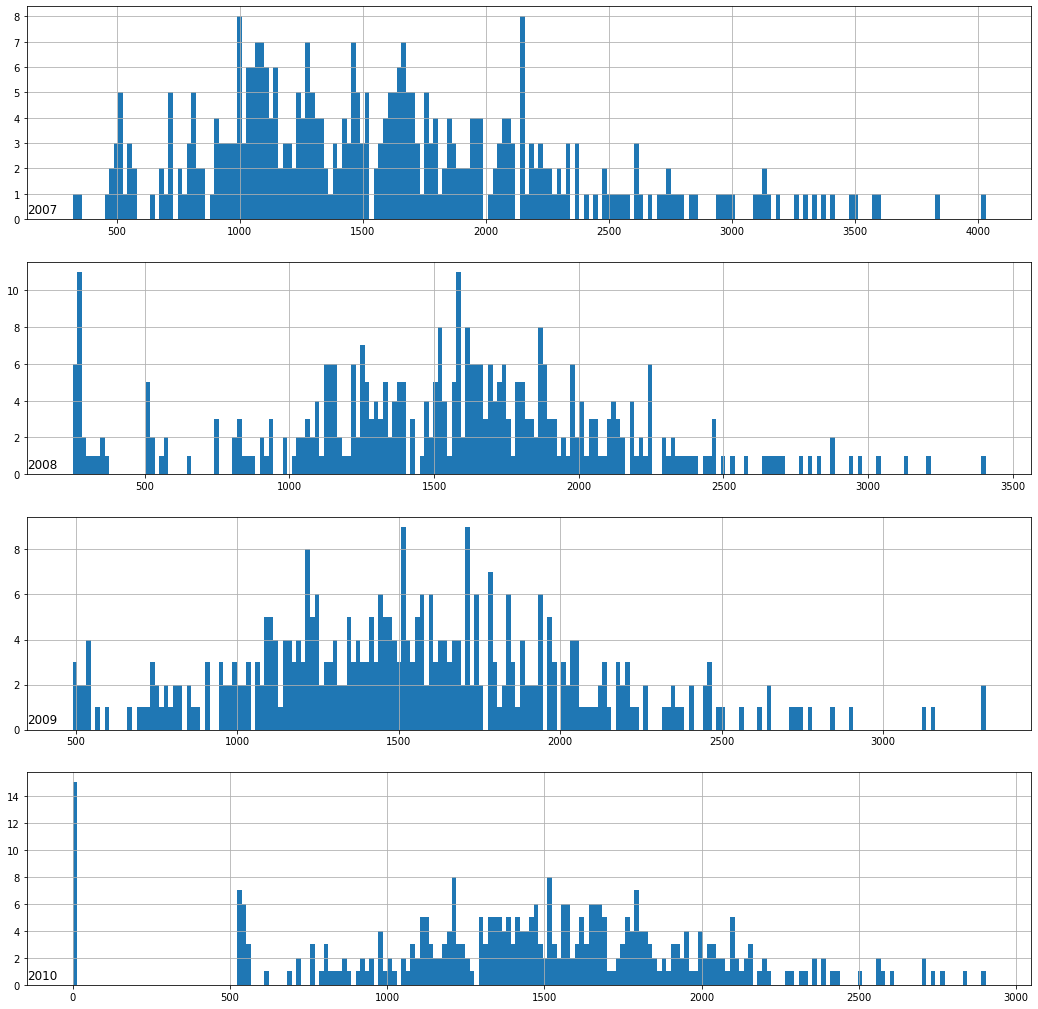

In [23]:
# Active power
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(years)):
    plt.subplot(len(years), 1, i+1)
    year = years[i]
    active_power_data = data[str(year)]
    active_power_data['Global_active_power'].hist(bins = 200)
    plt.title(str(year), y = 0, loc = 'left')
plt.show()
fig.tight_layout()

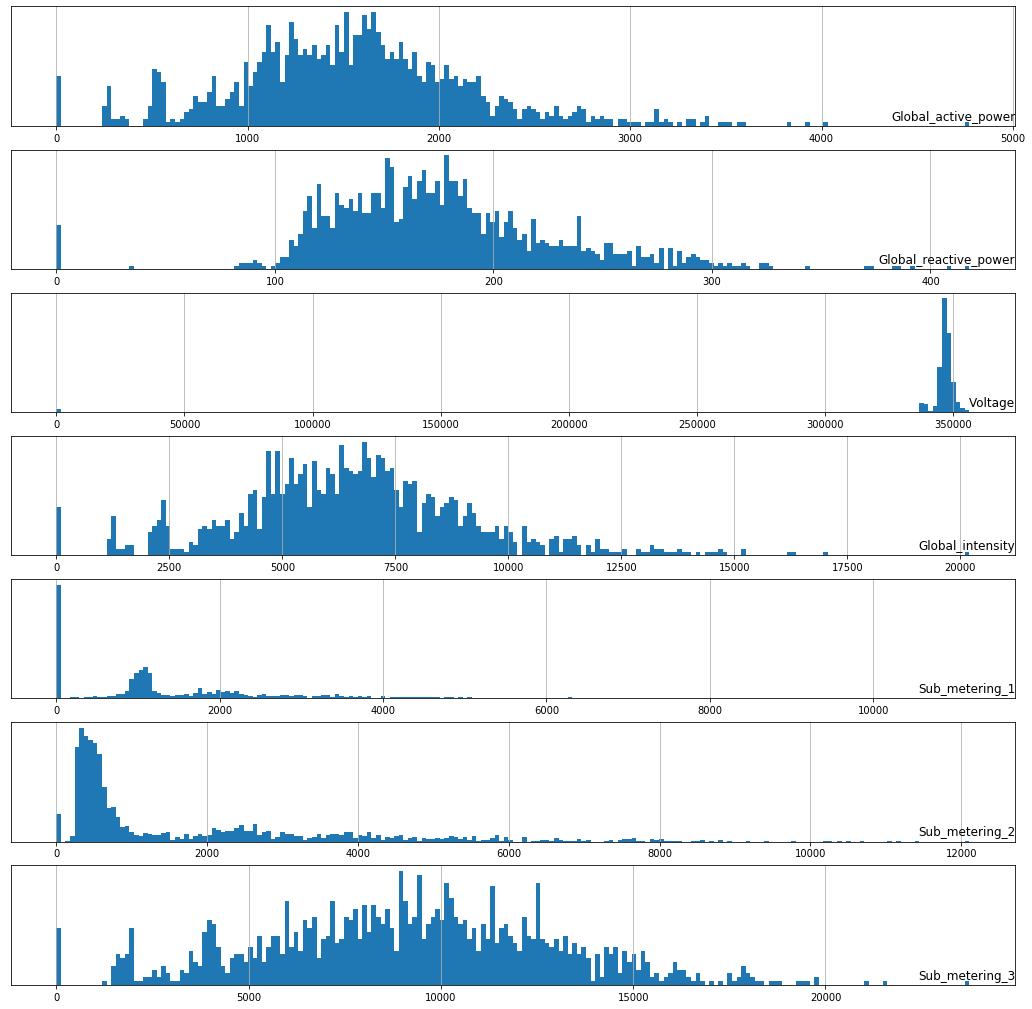

In [24]:
# for whole data
fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    data[name].hist(bins=200)
    plt.title(name, y=0, loc = 'right')
    plt.yticks([])
plt.show()
fig.tight_layout()

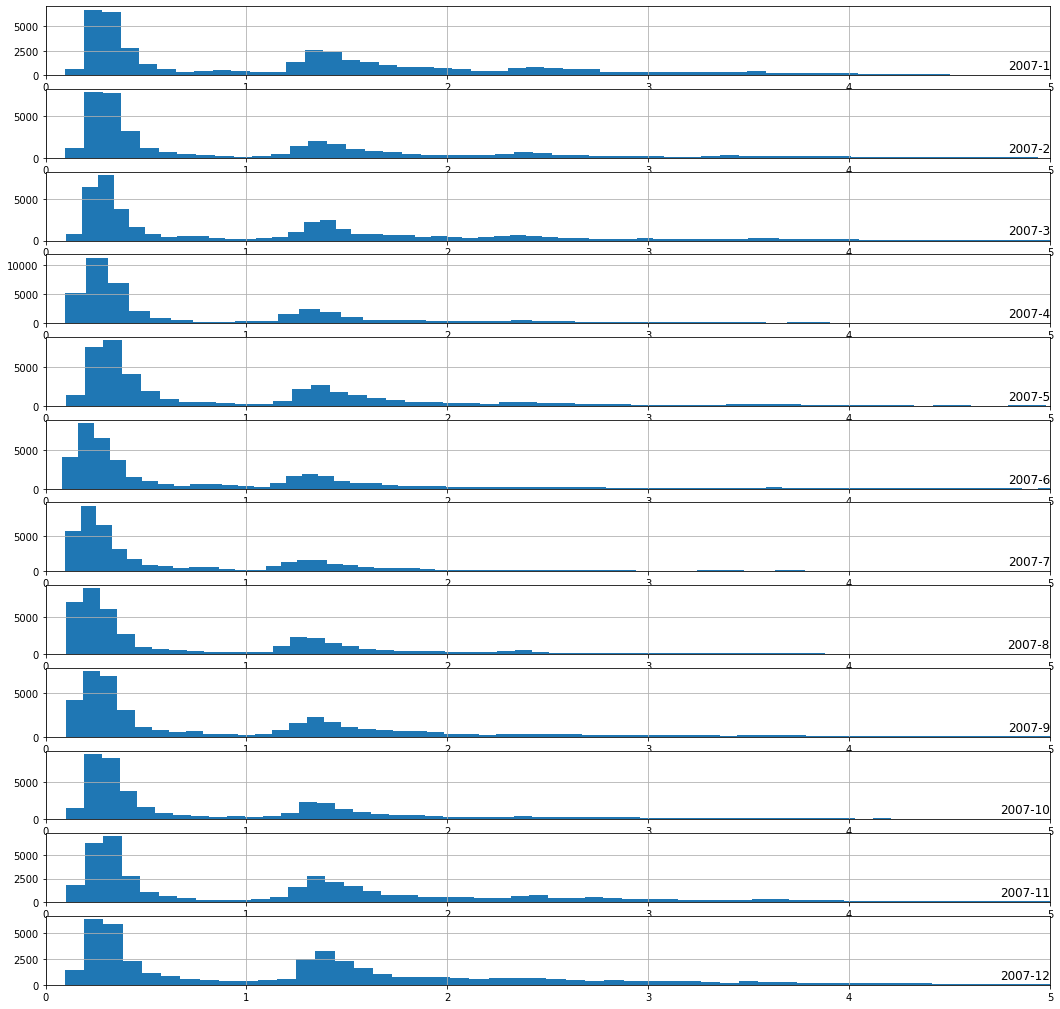

In [26]:
# for each month of 2007
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize=(18,18))

for i in range(len(months)):
    ax = plt.subplot(len(months), 1, i+1)
    month = '2007-' + str(months[i])
    active_power_data = dataset[month]
    active_power_data['Global_active_power'].hist(bins = 100)
    ax.set_xlim(0,5)
    plt.title(month, y = 0, loc = 'right')
plt.show()
fig.tight_layout()

##### What can we predict
- Forecast hourly consumption for the next day.
- Forecast daily consumption for the next week.
- Forecast daily consumption for the next month.
- Forecast monthly consumption for the next year.

# **Problem Framing**
Given recent power consumption, what is the expected power consumption for the week ahead?
This requires that a predictive model forecast the total active power for each day over the next seven days

A model of this type could be helpful within the household in planning expenditures. It could also be helpful on the supply side for planning electricity demand for a specific household.

Input -> 						Predict

[Week1]	->					Week2

[Week2]	->			Week3

[Week3]	->	Week4



In [0]:
data_train = data.loc[:'2009-12-31', :]['Global_active_power']
data_test = data['2010']['Global_active_power']

In [28]:
data_train.shape, data_test.shape

((1112,), (345,))

# Training data preparation

In [0]:
data_train = np.array(data_train)
X_train, y_train = [], []

for i in range(7, len(data_train)-7):
    X_train.append(data_train[i-7:i])
    y_train.append(data_train[i:i+7])

In [31]:
pd.DataFrame(X_train).head(), pd.DataFrame(y_train).head()

(          0         1         2         3         4         5         6
 0  1209.176  3390.460  2203.826  1666.194  2225.748  1723.288  2341.338
 1  3390.460  2203.826  1666.194  2225.748  1723.288  2341.338  4773.386
 2  2203.826  1666.194  2225.748  1723.288  2341.338  4773.386  2550.012
 3  1666.194  2225.748  1723.288  2341.338  4773.386  2550.012  2743.120
 4  2225.748  1723.288  2341.338  4773.386  2550.012  2743.120  3934.110,
           0         1         2         3         4         5         6
 0  4773.386  2550.012  2743.120  3934.110  1528.760  2072.638  3174.392
 1  2550.012  2743.120  3934.110  1528.760  2072.638  3174.392  2796.108
 2  2743.120  3934.110  1528.760  2072.638  3174.392  2796.108  3494.196
 3  3934.110  1528.760  2072.638  3174.392  2796.108  3494.196  2749.004
 4  1528.760  2072.638  3174.392  2796.108  3494.196  2749.004  1824.760)

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [34]:
X_train.shape

(1098, 7)

In [0]:
X_train = X_train.reshape(1098, 7, 1)

# LSTM Model 

In [36]:
reg = Sequential()
reg.add(LSTM(units = 200, activation = 'relu', input_shape=(7,1)))
reg.add(Dense(7))
reg.compile(loss='mse', optimizer='adam')
reg.fit(X_train, y_train, epochs = 100)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1098 samples
Epoch 1/100
1098/1098 [==============================] - 2s 2ms/sample - loss: 0.0640
Epoch 2/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0246
Epoch 3/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0240
Epoch 4/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0241
Epoch 5/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0240
Epoch 6/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0239
Epoch 7/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0239
Epoch 8/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0239
Epoch 9/100
1098/1098 [==============================] - 1s 1ms/sample - loss: 0.0238
Epoch 10/100
1098/1098 [=====

# Test data preparation

In [37]:
data_test = np.array(data_test)
X_test, y_test = [], []

for i in range(7, len(data_test)-7):
    X_test.append(data_test[i-7:i])
    y_test.append(data_test[i:i+7])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
X_test = X_test.reshape(331,7,1)
X_test.shape

(331, 7, 1)

In [0]:
y_pred = reg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)
y_true = y_scaler.inverse_transform(y_test)

In [0]:
def evaluate_model(y_true, y_predicted):
    scores = []
    
    #calculate scores for each day
    for i in range(y_true.shape[1]):
        mse = mean_squared_error(y_true[:, i], y_predicted[:, i])
        rmse = np.sqrt(mse)
        scores.append(rmse)
    
    #calculate score for whole prediction
    total_score = 0
    for row in range(y_true.shape[0]):
        for col in range(y_predicted.shape[1]):
            total_score = total_score + (y_true[row, col] - y_predicted[row, col])**2
    total_score = np.sqrt(total_score/(y_true.shape[0]*y_predicted.shape[1]))
    
    return total_score, scores

In [0]:
total_score, each_day_scores = evaluate_model(y_true, y_pred)

In [44]:
each_day_scores

[590.2926584170895,
 600.647002041001,
 593.2499092233032,
 573.6586612547711,
 594.0303919889594,
 586.0966812398369,
 579.7600498078206]

In [45]:
total_score

588.3093330878751

In [46]:
np.std(y_true[0])

710.0253857243853